# Generating Synthetic Datasets for Dimension Reduction

In [123]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from functools import partial

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

from src.data import Dataset
from src.data.datasets import process_dataset, add_synthset, load_dataset

from src.data import synthetic as synthset
from src.visualization import plotting as viz

from pprint import pprint

In [2]:
sns.set_context("poster")
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
random_state = 6502
n_points = 1000
noise = 0.05

In [5]:
synthsets = {
    's-curve': partial(datasets.samples_generator.make_s_curve, n_points, random_state=random_state),
    'swiss-roll': partial(datasets.samples_generator.make_swiss_roll, n_points, noise=0.2, random_state=random_state),
    'gaussian-blobs': partial(datasets.samples_generator.make_blobs, n_points, centers=4, n_features=10,
                              random_state=random_state),
    'sphere': partial(synthset.sample_sphere_surface, n_points, random_state=random_state),
    'ball': partial(synthset.sample_ball, n_points, random_state=random_state),
    'helix': partial(synthset.helix, random_state=random_state, noise=0.05),
    'broken-swiss-roll': partial(synthset.synthetic_data, kind='broken_swiss_roll', random_state=random_state, noise=noise, n_points=1000),
    'difficult': partial(synthset.synthetic_data, kind='difficult', random_state=random_state, noise=0.02, n_points=6000),
    'twinpeaks': partial(synthset.synthetic_data, kind='twinpeaks', random_state=random_state, noise=noise, n_points=3000),
}

## S-Curve

In [114]:
dataset_name = 's-curve'
func = partial(datasets.samples_generator.make_s_curve, n_points, random_state=random_state)
add_synthset(dataset_name, func)


{'action': 'generate',
 'load_function_module': 'sklearn.datasets.samples_generator',
 'load_function_name': 'make_s_curve',
 'load_function_args': (1000,),
 'load_function_kwargs': {'random_state': 6502}}

Synthetic data produced by: sklearn.datasets.samples_generator.make_s_curve

>>> make_s_curve(1000, random_state=6502)

>>> help(make_s_curve)

Generate an S curve dataset.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of sample points on the S curve.

    noise : float, optional (default=0.0)
        The standard deviation of the gaussian noise.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Returns
    -------
    X : array of shape [n_samples, 3]
        The points.

    t : array of shape [n_samples]
        The univariate position of the sample according to the main dimension
        

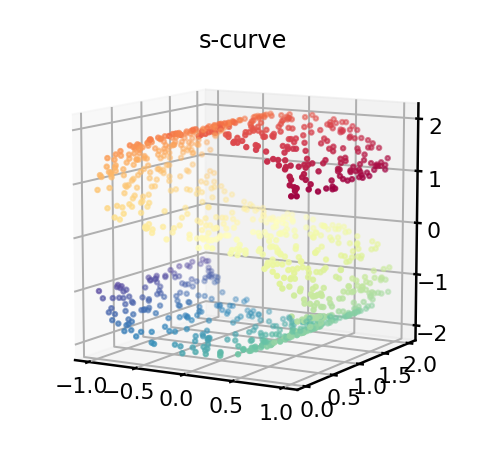

In [122]:
ds = load_dataset(dataset_name)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

## Swiss Roll

In [124]:
dataset_name = 'swiss-roll'
func = partial(datasets.samples_generator.make_swiss_roll, n_points, noise=0.2, random_state=random_state)
add_synthset(dataset_name, func)

{'action': 'generate',
 'load_function_module': 'sklearn.datasets.samples_generator',
 'load_function_name': 'make_swiss_roll',
 'load_function_args': (1000,),
 'load_function_kwargs': {'noise': 0.2, 'random_state': 6502}}

Synthetic data produced by: sklearn.datasets.samples_generator.make_swiss_roll

>>> make_swiss_roll(1000, noise=0.2, random_state=6502)

>>> help(make_swiss_roll)

Generate a swiss roll dataset.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of sample points on the S curve.

    noise : float, optional (default=0.0)
        The standard deviation of the gaussian noise.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Returns
    -------
    X : array of shape [n_samples, 3]
        The points.

    t : array of shape [n_samples]
        The univariate position of the sample according to the m

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca8b932a58>)

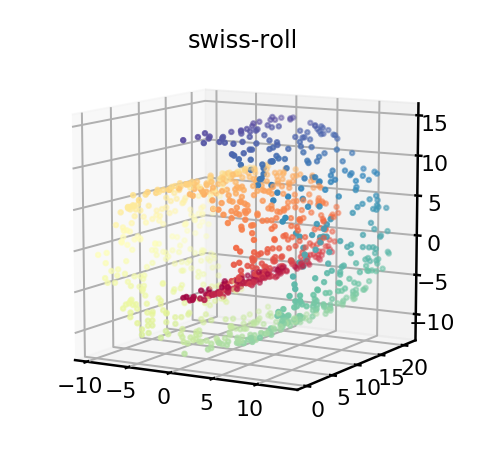

In [125]:
ds = load_dataset(dataset_name)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

## Gaussian Blobs

In [126]:
dataset_name = 'gaussian-blobs'
func = partial(datasets.samples_generator.make_blobs, n_points, centers=4, n_features=10,
                              random_state=random_state)
add_synthset(dataset_name, func)

{'action': 'generate',
 'load_function_module': 'sklearn.datasets.samples_generator',
 'load_function_name': 'make_blobs',
 'load_function_args': (1000,),
 'load_function_kwargs': {'centers': 4,
  'n_features': 10,
  'random_state': 6502}}

Synthetic data produced by: sklearn.datasets.samples_generator.make_blobs

>>> make_blobs(1000, centers=4, n_features=10, random_state=6502)

>>> help(make_blobs)

Generate isotropic Gaussian blobs for clustering.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.

    n_features : int, optional (default=2)
        The number of features for each sample.

    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.

    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.

    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers are
        generated at random.

    shuffle : boolean, optional (

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca8ba41a90>)

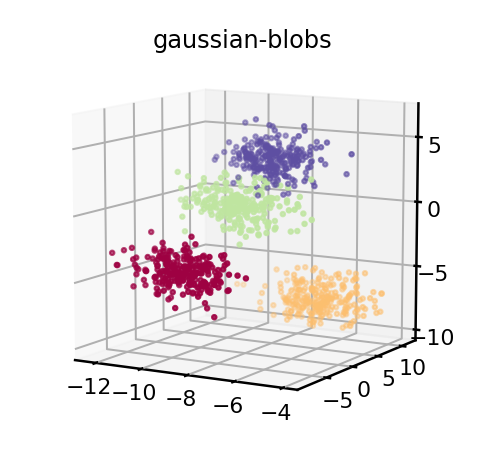

In [127]:
ds = load_dataset(dataset_name)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca90c35128>)

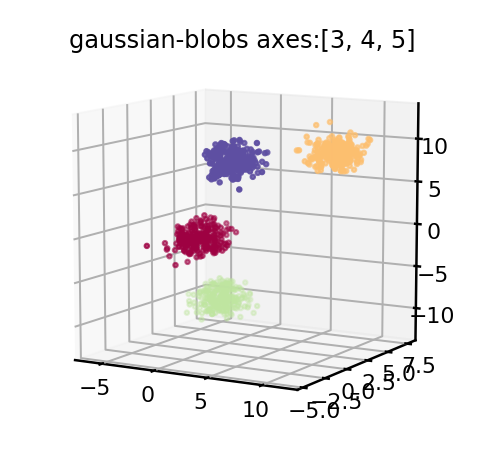

In [9]:
dim_list = [3, 4, 5]
viz.plot_3d_dataset(ds.data, ds.target, title=f"{ds.metadata['dataset_name']} axes:{dim_list}", dim_list=[3, 4, 5])


## Surface of a Sphere

In [128]:
dataset_name = 'sphere'
func = partial(synthset.sample_sphere_surface, n_points, random_state=random_state)
add_synthset(dataset_name, func)

{'action': 'generate',
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'sample_sphere_surface',
 'load_function_args': (1000,),
 'load_function_kwargs': {'random_state': 6502}}

Synthetic data produced by: src.data.synthetic.sample_sphere_surface

>>> sample_sphere_surface(1000, random_state=6502)

>>> help(sample_sphere_surface)

Sample on the surface of a sphere

    See Wolfram Sphere Point Picking
    (Muller 1959, Marsaglia 1972)

    Other ways to do this: http://www-alg.ist.hokudai.ac.jp/~jan/randsphere.pdf,
    Use a very simple trick to color the points in a reasonable way
    


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca8b947a90>)

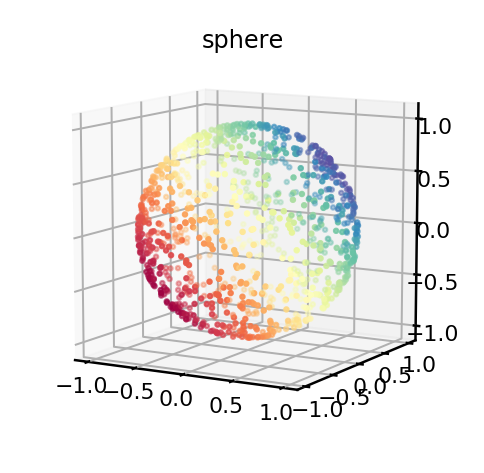

In [129]:
ds = load_dataset(dataset_name)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca8b93f390>)

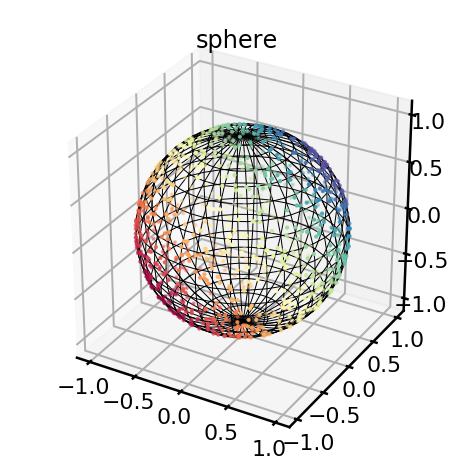

In [130]:
viz.sphere_plot(ds.data, ds.target, title=ds.metadata['dataset_name'], wireframe=True, s=5)

# XXX Fix Below

 ## Sample inside a unit ball

Synthetic data produced by: src.data.synthetic.sample_ball

>>> sample_ball(1000, random_state=6502)

>>> help(sample_ball)

Sample from a unit ball

    Use rejection sampling on the unit cube
    


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca924bf160>)

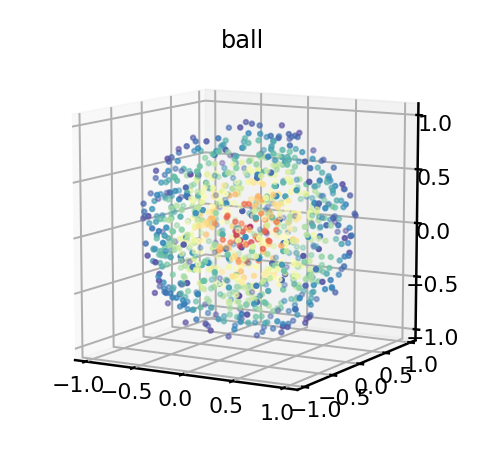

In [12]:
dataset_name = 'ball'
func = synthsets[dataset_name]
dso = synthset.create_dsopts_from_func(dataset_name, func)
ds = process_dataset(**dso)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca924da390>)

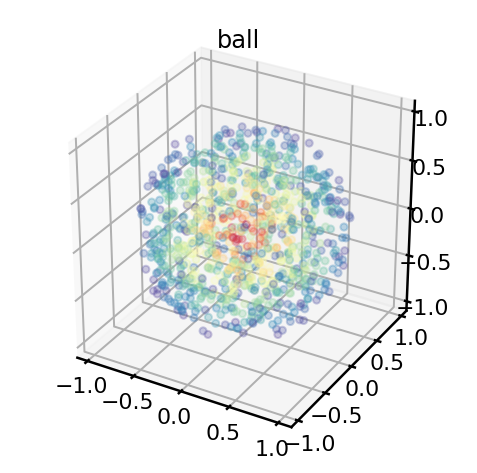

In [13]:
viz.sphere_plot(ds.data, ds.target, alpha=0.3, title=ds.metadata['dataset_name'])

## Helix

Synthetic data produced by: src.data.synthetic.helix

>>> helix(random_state=6502, noise=0.05)

>>> help(helix)


    Sample from a toroidal helix.

    major_radius:
        Major (equatorial) radius of the torus
    minor_radius:
        Minor (cross-section) radius of the torus
    n_twists:
        Number of twists in the toroidal helix
    n_points:
        Number of points to return
    random_state: int or None
        For seeding the random number generator
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.


    x = r_1 + r_2 cos(nt)) * cos(t)
    y = r_1 + r_2 cos(nt)) * sin(t)
    z = r_2 sin(nt)

    where $n$ is `n_twists`, $r_1$ is the `major_radius`
    and $r_2$ is the `minor_radius`

    


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca908937f0>)

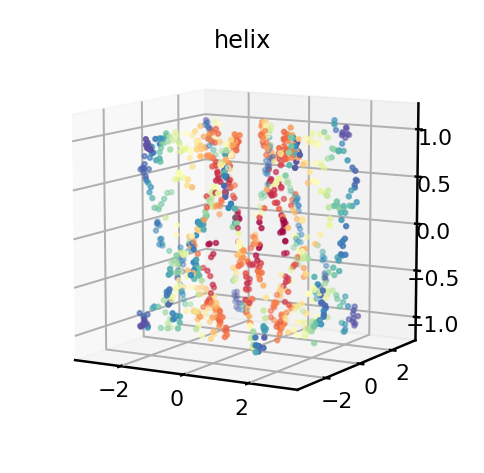

In [14]:
dataset_name = 'helix'
func = synthsets[dataset_name]
dso = synthset.create_dsopts_from_func(dataset_name, func)
ds = process_dataset(**dso)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

## Broken Swiss Roll

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(kind='broken_swiss_roll', random_state=6502, noise=0.05, n_points=1000)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_points, 2]
        Th

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca90770668>)

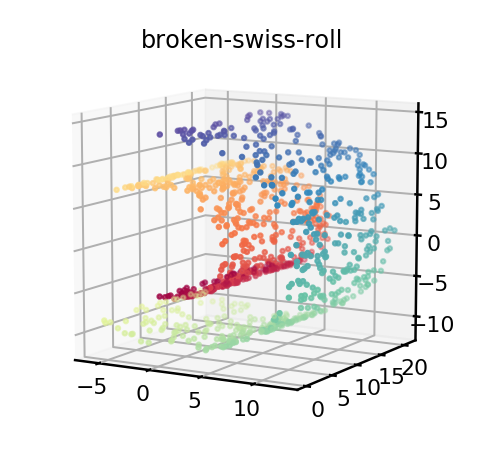

In [15]:
dataset_name = 'broken-swiss-roll'
func = synthsets[dataset_name]
dso = synthset.create_dsopts_from_func(dataset_name, func)
ds = process_dataset(**dso)
print(ds.DESCR)
pprint(ds.metadata)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

## 5-dimensional "Difficult"

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(kind='difficult', random_state=6502, noise=0.02, n_points=6000)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_points, 2]
        The genera

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca906d3320>)

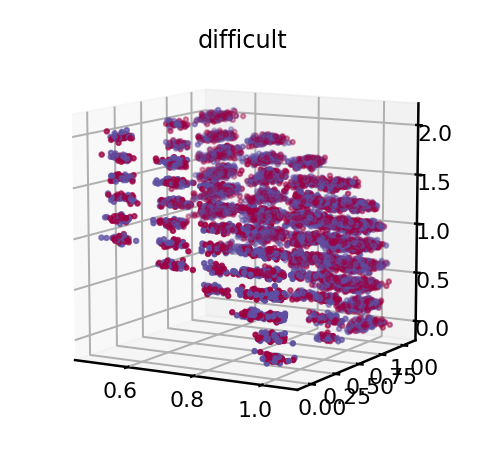

In [16]:
dataset_name = 'difficult'
func = synthsets[dataset_name]
dso = synthset.create_dsopts_from_func(dataset_name, func)
ds = process_dataset(**dso)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

# Twin Peaks

'''
        case 'twinpeaks'
            inc = 1.5 / sqrt(n);
            [xx2, yy2] = meshgrid(-1:inc:1);
            xy = 1 - 2 * rand(2, n);
            X = [xy; sin(pi * xy(1,:)) .* tanh(3 * xy(2,:))]' + noise * randn(n, 3);
            X(:,3) = X(:,3) * 10;
            t = xy';
            %labels = uint8(X(:,3));
            labels = rem(sum(round((X + repmat(min(X, [], 1), [size(X, 1) 1])) ./ 10), 2), 2);
'''

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(kind='twinpeaks', random_state=6502, noise=0.05, n_points=3000)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_points, 2]
        The genera

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fca901a7ba8>)

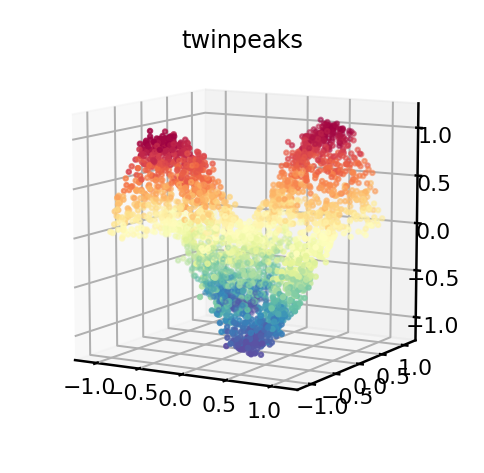

In [17]:
dataset_name = 'twinpeaks'
func = synthsets[dataset_name]
dso = synthset.create_dsopts_from_func(dataset_name, func)
ds = process_dataset(**dso)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name'])

## Creating Dataset objects from synthetic dataset functions


In [31]:
import src.data as dd

In [30]:
dd.

SyntaxError: invalid syntax (<ipython-input-30-0d54423887b4>, line 1)